# ECE 590, Fall 2019 
## Problem Set 4 

## Full name: Ana B. Barcenas J.


In [67]:
import warnings
warnings.simplefilter('ignore')

### Problem 2: Step-size in Full Gradient Descent

In [1]:
import numpy as np

In [16]:
# Define the objective function to minimize

def obj_function(X):
    sum_1 = 0
    sum_2 = 0
    for i in range(len(X)):
        x_sqr = X[i]**2
        sum_1 += x_sqr
    
    for j in range(len(X)):
        for k in range(len(X)):
            if j < k:
                #print(X[j])
                sum_2 += (X[k]*X[j])
            else:
                pass
        
    return sum_1+sum_2

obj_function(x)

60

In [36]:
def differentiation(X):
    d0 = 2*X[0]+X[1]+X[2]+X[3]+X[4]
    d1 = X[0]+2*X[1]+X[2]+X[3]+X[4]
    d2 = X[0]+X[1]+2*X[2]+X[3]+X[4]
    d3 = X[0]+X[1]+X[2]+2*X[3]+X[4]
    d4 = X[0]+X[1]+X[2]+X[3]+2*X[4]

    output = np.array([d0,d1,d2,d3,d4])
    return output

def gradient_d(step_size,X):
    return X - step_size*differentiation(X)

# Define the starting point X
X = np.array([2,2,2,2,2])

for t in range(1,100):
    # Let's the learning rate to be defined as 1/t 
    # where t is the current iteration number
    step_size = 1/t
    X = gradient_d(step_size,X)
    loss = obj_function(X)
    # Instead of defining a certain number of iterations, 
    # let the value of the cost function decide when to 
    # stop iterating
    if loss <= 0.1:  
        print("Iteration (loss=0): ",t)
        break

Iteration (loss=0):  6


### Problem 4: Binary Classification with Pytorch

In [39]:
# import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Torch packages
import torch
from torch.autograd import Variable
from torch import Tensor
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

In [40]:
# Let's define a class to compute logistic regression

class LogisticRegression(torch.nn.Module):
    
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features=input_dim,out_features=output_dim)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    pass

class other(torch.nn.Module):
    
    def __init__(self):
        super(other, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim,32)
        self.fc2 = torch.nn.Linear(32,16)
        self.fc3 = torch.nn.Linear(16,1)
        pass
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return torch.sigmoid(x)
    pass

In [70]:
# Let's define a function that takes all the necessary inputs to 
# train and test the model and compute its losses

def model_losses_plot(X_train,y_train,X_test,y_test,model_,criterion_,optimizer_):
    train_loss = []
    test_loss = []
    
    for epoch in range(100):
        model_.train()
        optimizer_.zero_grad()
        y_pred = model_(X_train)
        loss = criterion_(y_pred, y_train)
        loss.backward()
        optimizer_.step()

        train_loss.append(float(loss))
        test_loss.append(float(criterion_(model_(X_test), y_test)))
        pass
    
    plt.plot(train_loss,label='Training loss',c="purple")
    plt.plot(test_loss,label='Testing loss')
    plt.legend(); plt.xlabel('Epoch'); plt.ylabel('Cross entropy')
    plt.title('Training/test losses')
    plt.show()
    pass

In [71]:
""" data preparation """

# read csv file 
df = pd.read_csv('breast_cancer.csv')

# extract the 'diagnosis' column as your targets 
# and convert the entries of targets to 0/1 
targets = pd.get_dummies(df.diagnosis).M

# extract your features data
data = df[[ 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
            'symmetry_se', 'fractal_dimension_se']]

# train/test split 
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=53)
X_train= Variable(Tensor(np.array(X_train)))
y_train = Variable(Tensor(np.array(y_train)))
X_test= Variable(Tensor(np.array(X_test)))
y_test = Variable(Tensor(np.array(y_test)))

input_dim = X_train.size()[1]
output_dim = 1

Model 1 (logistic reg.):


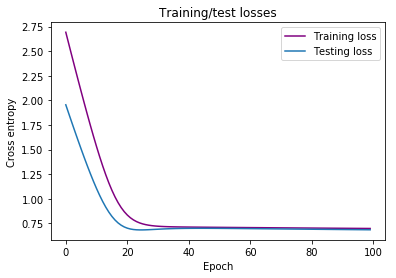

In [72]:
# Now, let's use the functions defined above and train the model

torch.manual_seed(530)
model1 = LogisticRegression()
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.001)

print('Model 1 (logistic reg.):')
model_losses_plot(X_train,y_train,X_test,y_test,model1,criterion1,optimizer1)

Model 2:


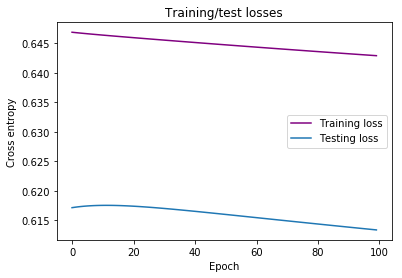

In [73]:
torch.manual_seed(530)
model2 = other()
criterion2 = torch.nn.BCELoss()
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.001)

print('Model 2:')
model_losses_plot(X_train,y_train,X_test,y_test,model2,criterion2,optimizer2)

### Problem 5 (Implementing a Two-Layer Neural Network)

In [ ]:
# Put your code here 